# Introduction and Background

We are interested in analyzing the success of Kickstarter projects to educate the Kickstarter project developers on what makes for a successful Kickstarter in order to help content creators improve their approach to creating new and successful products/services. We want to ultimately help create a much more successful developer community in order to avoid any waste in resources and time put into failing projects. As crowdfunding rises in popularity, ensuring that the community is able to build projects that are meaningful and actually have a target audience grows increasingly important.

That being said, our goal is not to fundamentally change any new projects, rather to offer them guidelines for how they might best position themselves to be successful. After all, it is the uniqueness of each new project on Kickstarter that makes the platform so great. We became really interested in exploring this topic after discovering that one of our favorite games (Exploding Kittens) actually owes its origins to Kickstarter. (See ref. 1). In fact, it was so successful, that interestingly enough, despite having the capital, they decided to launch their second product on Kickstarter.

Now, while one can find sources already on what can improve a Kickstarters success (ref. 2), these are primarily anecdotal, and we hope to offer a more data driven response.

References:
- 1) https://www.youtube.com/watch?v=oStLD-yYAy0
- 2) https://www.forbes.com/sites/amadoudiallo/2014/01/24/crowdfunding-secrets-7-tips-for-kickstarter-success/#791ee5766d8d


###### Research Question:
What makes a successful Kickstarter? What types of products are most appropriate for crowdfunding?

###### Hypothesis:
We believe that the timespan, categories, the goal amount, and the launch date of projects will have a significant correlation to the project's success. Specifically, we observed (from various articles online) that shorter timespans would lead to more successful projects and (from personal experience) projects in the games category would tend to be more successful as people enjoy new and creative games.

# Data Description

The dataset used for our project is a Kaggle dataset of more than 300,000 Kickstarter projects. Our dataset provides several important metrics for each Kickstarter project, such as the overall category that each Kickstarter project is classified in, the main category within the overall category to more precisely classify each project, the type of currency that was used in raising funds for the project, the deadline for the project to reach its goal, the number of backers for each project, and the amount of money pledged in USD. For our project, we will be focusing on all of the Kickstarter projects. From each Kickstarter project, we will be analyzing the following columns:

- Name
- Category
- Main Category
- Currency
- Deadline
- Goal
- Launched
- Pledged
- State
- Backers
- USD Pledged Real

After cleaning our data, we will be focusing on Name, Category, Main Category, Deadline, Goal, Launched, Pledged, State, and Backers.

By comparing Kickstarter projects in one category and main category against other projects in other categories and main categories, we will be able to analyze which category and main category have the most amount of Kickstarter projects that successfully reach their goal by their deadline. We will also determine which category and main category raise the greatest total amount of money across all of the Kickstarter projects in each category and main category. We will determine the overall success of each category and main category based on these two metrics that will be determined from our data analysis.

# Data Cleaning/Pre-processing

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

In [2]:
# Import data into dataframe
kickstarter_df = pd.read_csv("ks-projects-201801.csv")

# Drop the columns we don't need:
#  id, currency, country
kickstarter_df = kickstarter_df.drop(kickstarter_df.columns[[0,4,11]], axis=1)

# Also drop goal, pledged, and usd pledged columns as we will be using usd_goal_real and usd_pledged real instead
kickstarter_df = kickstarter_df.drop(kickstarter_df.columns[[4,6,9]], axis=1)

# Check out the data
kickstarter_df.head()

,name,category,main_category,deadline,launched,state,backers,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,1283.0,19500.00


In [3]:
# Check if any rows contain null values
null_rows = kickstarter_df[kickstarter_df.isnull().any(axis=1)]
null_rows

,name,category,main_category,deadline,launched,state,backers,usd_pledged_real,usd_goal_real
166851,NaN,Narrative Film,Film & Video,2012-02-29,2012-01-01 12:35:31,failed,1,100.00,200000.00
307234,NaN,Video Games,Games,2013-01-06,2012-12-19 23:57:48,failed,12,316.05,3224.97
309991,NaN,Product Design,Design,2016-07-18,2016-06-18 05:01:47,suspended,0,0.00,2500.00
338931,NaN,Painting,Art,2011-12-05,2011-11-06 23:55:55,failed,5,220.00,35000.00


In [4]:
# Drop all rows with missing data
kickstarter_df.dropna(inplace=True)

In [5]:
# Add the percentage_raised column:
#   The percentage of money pledged (raised) vs the expected goal
kickstarter_df["percentage_raised"] = ((kickstarter_df["usd_pledged_real"] / kickstarter_df["usd_goal_real"]) * 100).apply(lambda x: round(x, 2))

kickstarter_df.head()

,name,category,main_category,deadline,launched,state,backers,usd_pledged_real,usd_goal_real,percentage_raised
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,0.0,1533.95,0.00
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,2421.0,30000.00,8.07
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,220.0,45000.00,0.49
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,1.0,5000.00,0.02
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,1283.0,19500.00,6.58


In [6]:
# Convert the deadline and launched columns to datetime values
kickstarter_df["deadline"] = pd.to_datetime(kickstarter_df["deadline"])
kickstarter_df["launched"] = pd.to_datetime(kickstarter_df["launched"])

# Add the timeline column:
#   The difference between the deadline and launch data
kickstarter_df["timeline"] = kickstarter_df["deadline"] - kickstarter_df["launched"]
kickstarter_df.head()

,name,category,main_category,deadline,launched,state,backers,usd_pledged_real,usd_goal_real,percentage_raised,timeline
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,0.0,1533.95,0.00,58 days 11:47:32
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,2421.0,30000.00,8.07,59 days 19:16:03
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,220.0,45000.00,0.49,44 days 23:39:10
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,1.0,5000.00,0.02,29 days 20:35:49
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,1283.0,19500.00,6.58,55 days 15:24:57


In [7]:
# Add a timeline_days column:
#   The number of days (as an int) each project lasted for

def getDays(datetime):
    return datetime.days

kickstarter_df["timeline_days"] = kickstarter_df["timeline"].apply(getDays)
kickstarter_df.head()

,name,category,main_category,deadline,launched,state,backers,usd_pledged_real,usd_goal_real,percentage_raised,timeline,timeline_days
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,0.0,1533.95,0.00,58 days 11:47:32,58
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,2421.0,30000.00,8.07,59 days 19:16:03,59
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,220.0,45000.00,0.49,44 days 23:39:10,44
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,1.0,5000.00,0.02,29 days 20:35:49,29
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,1283.0,19500.00,6.58,55 days 15:24:57,55


In [8]:
# Reorder the columns
kickstarter_df = kickstarter_df[["name", "category", "main_category", "state", "deadline", "launched", "timeline", "timeline_days", "backers", "usd_pledged_real", "usd_goal_real", "percentage_raised"]]
kickstarter_df

,name,category,main_category,state,deadline,launched,timeline,timeline_days,backers,usd_pledged_real,usd_goal_real,percentage_raised
0,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,2015-10-09,2015-08-11 12:12:28,58 days 11:47:32,58,0,0.00,1533.95,0.00
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,failed,2017-11-01,2017-09-02 04:43:57,59 days 19:16:03,59,15,2421.00,30000.00,8.07
2,Where is Hank?,Narrative Film,Film & Video,failed,2013-02-26,2013-01-12 00:20:50,44 days 23:39:10,44,3,220.00,45000.00,0.49
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,failed,2012-04-16,2012-03-17 03:24:11,29 days 20:35:49,29,1,1.00,5000.00,0.02
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,canceled,2015-08-29,2015-07-04 08:35:03,55 days 15:24:57,55,14,1283.00,19500.00,6.58
5,Monarch Espresso Bar,Restaurants,Food,successful,2016-04-01,2016-02-26 13:38:27,34 days 10:21:33,34,224,52375.00,50000.00,104.75
6,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,successful,2014-12-21,2014-12-01 18:30:44,19 days 05:29:16,19,16,1205.00,1000.00,120.50
7,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,failed,2016-03-17,2016-02-01 20:05:12,44 days 03:54:48,44,40,453.00,25000.00,1.81
8,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,canceled,2014-05-29,2014-04-24 18:14:43,34 days 05:45:17,34,58,8233.00,125000.00,6.59
9,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,canceled,2014-08-10,2014-07-11 21:55:48,29 days 02:04:12,29,43,6240.57,65000.00,9.60


Here, we remove any outlier values that fall above or below 3 times the standard deviation. We chose to drop these outliers as our main focus is on the majority of Kickstarter projects; we do not want the excessively successful or overly ambitious projects to skew our results. Thus, we focus on the "average" projects: the projects that most people are likely to launch and model after.

In [9]:
# Remove outliers from the timeline_days, backers, usd_pledged_real, usd_goal_real, and percentage_raised columns
def removeOutliers(df, column):
    '''
    Drop all rows from the df that fall above or below 3 times the standard deviation of the specified column and
    return the new df.
    '''
    
    # Set the thresholds
    std3 = 3 * df[column].std()
    std_max = df[column].mean() + std3
    std_min = df[column].mean() - std3

    # Grab all rows in between the thresholds
    df = df[df[column] > std_min]
    df = df[df[column] < std_max]
    
    return df

kickstarter_df = removeOutliers(kickstarter_df, "timeline_days")
kickstarter_df = removeOutliers(kickstarter_df, "backers")
kickstarter_df = removeOutliers(kickstarter_df, "usd_pledged_real")
kickstarter_df = removeOutliers(kickstarter_df, "usd_goal_real")
kickstarter_df = removeOutliers(kickstarter_df, "percentage_raised")

kickstarter_df

,name,category,main_category,state,deadline,launched,timeline,timeline_days,backers,usd_pledged_real,usd_goal_real,percentage_raised
0,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,2015-10-09,2015-08-11 12:12:28,58 days 11:47:32,58,0,0.00,1533.95,0.00
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,failed,2017-11-01,2017-09-02 04:43:57,59 days 19:16:03,59,15,2421.00,30000.00,8.07
2,Where is Hank?,Narrative Film,Film & Video,failed,2013-02-26,2013-01-12 00:20:50,44 days 23:39:10,44,3,220.00,45000.00,0.49
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,failed,2012-04-16,2012-03-17 03:24:11,29 days 20:35:49,29,1,1.00,5000.00,0.02
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,canceled,2015-08-29,2015-07-04 08:35:03,55 days 15:24:57,55,14,1283.00,19500.00,6.58
5,Monarch Espresso Bar,Restaurants,Food,successful,2016-04-01,2016-02-26 13:38:27,34 days 10:21:33,34,224,52375.00,50000.00,104.75
6,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,successful,2014-12-21,2014-12-01 18:30:44,19 days 05:29:16,19,16,1205.00,1000.00,120.50
7,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,failed,2016-03-17,2016-02-01 20:05:12,44 days 03:54:48,44,40,453.00,25000.00,1.81
8,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,canceled,2014-05-29,2014-04-24 18:14:43,34 days 05:45:17,34,58,8233.00,125000.00,6.59
9,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,canceled,2014-08-10,2014-07-11 21:55:48,29 days 02:04:12,29,43,6240.57,65000.00,9.60


To further analyze our data, we will separate our kickstarter_df dataframe into two separate dataframes. The first dataframe will have kickstarter projects that met their goal (meaning only the projects whose state = successful). The second dataframe will have kickstarter projects that did not meet their goal (meaning only the projects whose state = failed or state = cancelled).

In [10]:
# Create the dataframe with only the successful Kickstarter projects
kickstarter_df_success = kickstarter_df.where(kickstarter_df['state'] == 'successful')

# Drop all rows with missing data
kickstarter_df_success.dropna(inplace=True)

kickstarter_df_success

,name,category,main_category,state,deadline,launched,timeline,timeline_days,backers,usd_pledged_real,usd_goal_real,percentage_raised
5,Monarch Espresso Bar,Restaurants,Food,successful,2016-04-01,2016-02-26 13:38:27,34 days 10:21:33,34.0,224.0,52375.00,50000.00,104.75
6,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,successful,2014-12-21,2014-12-01 18:30:44,19 days 05:29:16,19.0,16.0,1205.00,1000.00,120.50
11,Lisa Lim New CD!,Indie Rock,Music,successful,2013-04-08,2013-03-09 06:42:58,29 days 17:17:02,29.0,100.0,12700.00,12500.00,101.60
18,Mike Corey's Darkness & Light Album,Music,Music,successful,2012-08-17,2012-08-02 14:11:32,14 days 09:48:28,14.0,7.0,250.00,250.00,100.00
20,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,successful,2013-12-30,2013-11-25 07:06:11,34 days 16:53:49,34.0,624.0,34268.00,20000.00,171.34
24,The Book Zoo - A Mini-Comic,Comics,Comics,successful,2014-11-12,2014-10-23 17:15:50,19 days 06:44:10,19.0,66.0,701.66,175.00,400.95
25,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,successful,2011-01-06,2010-12-07 23:16:50,29 days 00:43:10,29.0,147.0,15827.00,10000.00,158.27
27,Permaculture Skills,Webseries,Film & Video,successful,2014-12-14,2014-11-14 18:02:00,29 days 05:58:00,29.0,571.0,42174.03,15313.04,275.41
28,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,successful,2016-01-28,2015-12-29 16:59:29,29 days 07:00:31,29.0,27.0,160.60,142.91,112.38
29,My Moon - Animated Short Film,Animation,Film & Video,successful,2017-05-03,2017-04-03 17:11:33,29 days 06:48:27,29.0,840.0,57577.31,50000.00,115.15


In [11]:
# Create the dataframe with only the failed and cancelled Kickstarter projects
kickstarter_df_fail = kickstarter_df.where(kickstarter_df['state'] != 'successful')

# Drop all rows with missing data
kickstarter_df_fail.dropna(inplace=True)

kickstarter_df_fail

,name,category,main_category,state,deadline,launched,timeline,timeline_days,backers,usd_pledged_real,usd_goal_real,percentage_raised
0,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,2015-10-09,2015-08-11 12:12:28,58 days 11:47:32,58.0,0.0,0.00,1533.95,0.00
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,failed,2017-11-01,2017-09-02 04:43:57,59 days 19:16:03,59.0,15.0,2421.00,30000.00,8.07
2,Where is Hank?,Narrative Film,Film & Video,failed,2013-02-26,2013-01-12 00:20:50,44 days 23:39:10,44.0,3.0,220.00,45000.00,0.49
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,failed,2012-04-16,2012-03-17 03:24:11,29 days 20:35:49,29.0,1.0,1.00,5000.00,0.02
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,canceled,2015-08-29,2015-07-04 08:35:03,55 days 15:24:57,55.0,14.0,1283.00,19500.00,6.58
7,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,failed,2016-03-17,2016-02-01 20:05:12,44 days 03:54:48,44.0,40.0,453.00,25000.00,1.81
8,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,canceled,2014-05-29,2014-04-24 18:14:43,34 days 05:45:17,34.0,58.0,8233.00,125000.00,6.59
9,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,canceled,2014-08-10,2014-07-11 21:55:48,29 days 02:04:12,29.0,43.0,6240.57,65000.00,9.60
10,Of Jesus and Madmen,Nonfiction,Publishing,failed,2013-10-09,2013-09-09 18:19:37,29 days 05:40:23,29.0,0.0,0.00,2406.39,0.00
12,The Cottage Market,Crafts,Crafts,failed,2014-10-02,2014-09-02 17:11:50,29 days 06:48:10,29.0,0.0,0.00,5000.00,0.00


To get a more holistic view of Kickstarter projects, we build a DataFrame contianing aggregate data of projects, separated by their main category.

In [12]:
# Create a new DataFrame to hold data about each main category

# Get the total number of projects in each category
categories_df = pd.DataFrame(kickstarter_df["main_category"].value_counts())
categories_df.columns = ["total_projects"]

# Get the total number of successful and unsuccessful projects in each category
categories_df["successful_projects"] = kickstarter_df_success["main_category"].value_counts()
categories_df["unsuccessful_projects"] = kickstarter_df_fail["main_category"].value_counts()

# Get the total and average number of backers for each category
categories_df["total_backers"] = pd.Series()
for index, row in categories_df.iterrows():
    categories_df.at[index, "total_backers"] = kickstarter_df.loc[kickstarter_df["main_category"] == index, "backers"].sum()
categories_df["avg_backers"] = (categories_df["total_backers"] / categories_df["total_projects"]).apply(lambda x: round(x, 0))

# Get the total amount pledged (in USD) and average amount pledged (per backer) for each category
categories_df["total_pledged_usd"] = pd.Series()
for index, row in categories_df.iterrows():
    categories_df.at[index, "total_pledged_usd"] = kickstarter_df.loc[kickstarter_df["main_category"] == index, "usd_pledged_real"].sum()
categories_df["avg_pledged_usd"] = (categories_df["total_pledged_usd"] / categories_df["total_backers"]).apply(lambda x: round(x, 0))

categories_df

,total_projects,successful_projects,unsuccessful_projects,total_backers,avg_backers,total_pledged_usd,avg_pledged_usd
Film & Video,62970,23189,39781,3028028.0,48.0,2.929104e+08,97.0
Music,51761,24061,27700,2443018.0,47.0,1.820873e+08,75.0
Publishing,39731,12180,27551,1860346.0,47.0,1.112092e+08,60.0
Games,33851,11239,22612,4739861.0,140.0,2.295951e+08,48.0
Technology,30914,4971,25943,1752624.0,57.0,1.702870e+08,97.0
Design,28608,9172,19436,3045905.0,106.0,2.299955e+08,76.0
Art,28054,11440,16614,1023302.0,36.0,7.226486e+07,71.0
Food,24483,5989,18494,1084597.0,44.0,9.715064e+07,90.0
Fashion,22577,5367,17210,899361.0,40.0,8.184915e+07,91.0
Theater,10874,6508,4366,480755.0,44.0,3.967478e+07,83.0


# Data Visualization

## Overall
We begin by visualizing the data of all Kickstarter projects (successful and unsuccessful projects) in order to get a better idea of the general nature of these projects.

In [13]:
# Quick stats on several project categories overall
kickstarter_df.describe()

,timeline,timeline_days,backers,usd_pledged_real,usd_goal_real,percentage_raised
count,372560,372560.000000,372560.000000,372560.000000,3.725600e+05,372560.000000
mean,33 days 14:38:46.947012,33.175438,60.270834,4367.705699,2.300617e+04,87.077081
std,12 days 19:57:52.524767,12.821958,155.224484,10027.681074,1.018185e+05,651.894180
min,0 days 00:07:17,0.000000,0.000000,0.000000,1.000000e-02,0.000000
25%,29 days 02:17:26.750000,29.000000,2.000000,30.000000,2.000000e+03,0.420000
50%,29 days 16:18:35.500000,29.000000,11.000000,587.000000,5.000000e+03,12.500000
75%,36 days 07:59:42,36.000000,52.000000,3729.895000,1.500000e+04,105.600000
max,91 days 23:06:13,91.000000,2817.000000,89300.220000,3.514511e+06,59744.850000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1197c9d30>,
      dtype=object)

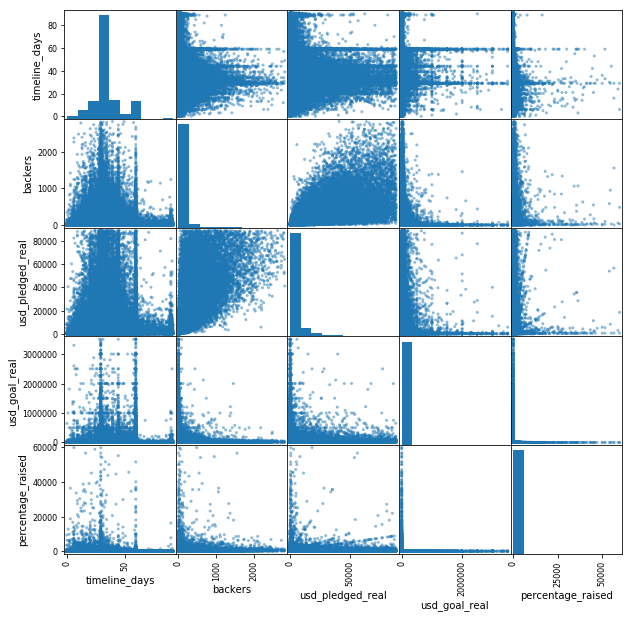

In [14]:
# Scatter matrix of timeline_days, backers, usd_pledged_real, usd_goal_real, and percentage_raised
pd.plotting.scatter_matrix(kickstarter_df[["timeline_days", "backers", "usd_pledged_real", "usd_goal_real", "percentage_raised"]], figsize=(10,10))

From the statistics and graph below on the distribution of projects by their status, we can see that roughly 35% of all projects on Kickstarter (with outliers removed) were successful; so, a little over a third of all projects end up succeeding with the majority of rest either failing or getting canceled.

In [15]:
# Quick stats on the successful vs non-successful projects
state_stats = (kickstarter_df["state"].value_counts() / len(kickstarter_df["state"])).apply(lambda x: round(x, 2))
               
print("Percentage of Projects in each State:")
print(state_stats)

Percentage of Projects in each State:
failed        0.53
successful    0.35
canceled      0.10
undefined     0.01
live          0.01
suspended     0.00
Name: state, dtype: float64


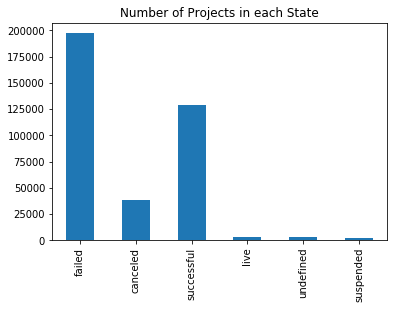

In [16]:
# Bar graph of project states
state_counts = Counter(kickstarter_df["state"])
states_df = pd.DataFrame.from_dict(state_counts, orient="index")
states_df.plot(kind="bar", title="Number of Projects in each State", legend=False)

From the statistics and graph below on the distribution of projects by main categories, we can see that the three most popular categories of projects are Film & Video, Music, and Publishing.

In [17]:
# Quick stats on project categories
category_stats = (kickstarter_df["main_category"].value_counts() / len(kickstarter_df["main_category"])).apply(lambda x: round(x,2))

print("Percentage of Projects in each Category:")
print(category_stats)

Percentage of Projects in each Category:
Film & Video    0.17
Music           0.14
Publishing      0.11
Games           0.09
Technology      0.08
Design          0.08
Art             0.08
Food            0.07
Fashion         0.06
Theater         0.03
Photography     0.03
Comics          0.03
Crafts          0.02
Journalism      0.01
Dance           0.01
Name: main_category, dtype: float64


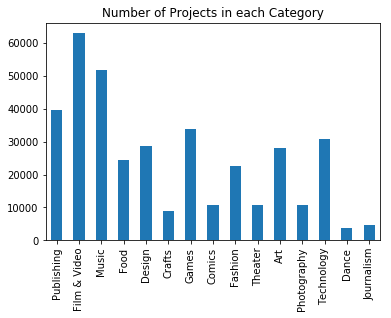

In [18]:
# Bar graph of project categories
category_counts = Counter(kickstarter_df["main_category"])
category_df = pd.DataFrame.from_dict(category_counts, orient="index")
category_df.plot(kind="bar", title="Number of Projects in each Category", legend=False)

From the statistics and graph below on the distribution of projects' goals (log transformed), we can see that the average goal is $10^3.73 or about $5370.31.

count    372560.000000
mean          3.734831
std           0.721435
min          -2.000000
25%           3.301030
50%           3.698970
75%           4.176091
max           6.545865
Name: usd_goal_real, dtype: float64

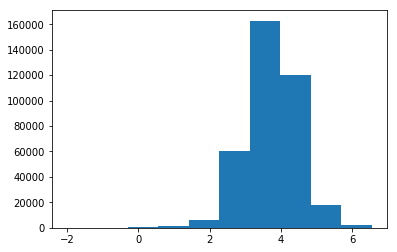

In [19]:
# Quick stats and histogram of project goals
goal_values = kickstarter_df["usd_goal_real"].copy()
goal_values.replace(0, 1, inplace=True)
goal_values = np.log10(goal_values)
plt.hist(goal_values)

goal_values.describe()

From the statistics and graph below on the distribution of how long projects on Kickstarter last for, we can see that a vast majority of projects last about a month, or 30 days.

In [20]:
# Quick stats on number of days each project lasted for
print("Project Timeline Statistics:")
kickstarter_df["timeline_days"].describe()

Project Timeline Statistics:


count    372560.000000
mean         33.175438
std          12.821958
min           0.000000
25%          29.000000
50%          29.000000
75%          36.000000
max          91.000000
Name: timeline_days, dtype: float64

Text(0.5,1,'Histogram of Project Timeline')

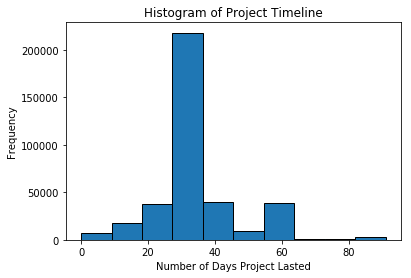

In [21]:
# Histogram of number of days each project lasted for
plt.hist(kickstarter_df["timeline_days"], edgecolor="black")
plt.xlabel("Number of Days Project Lasted")
plt.ylabel("Frequency")
plt.title("Histogram of Project Timeline")

From the graph below on the average number of backers per main category, we can see that Games, Comics, and Design have the most support on the platform.

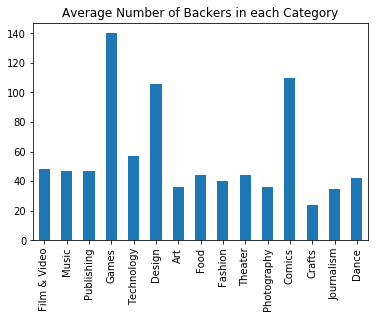

In [22]:
# Bar graph of the average number of backers for each category
category_backers_df = categories_df.copy()
category_backers_df.drop(category_backers_df.columns[[0, 1, 2, 3, 5, 6]], axis=1, inplace=True)
category_backers_df.plot(kind="bar", title="Average Number of Backers in each Category", legend=False)

From the statistics and graph below on the average money pledge per backer for each category, we can see that several categories have pretty high average pledges. The top three are Technology, Film & Video, and Fashion (with Food not too far behind). These values could also be good indicators for which categories will have greater financial support in.

In [23]:
categories_df["avg_pledged_usd"].sort_values(ascending=False)

Technology      97.0
Film & Video    97.0
Fashion         91.0
Food            90.0
Theater         83.0
Dance           82.0
Photography     79.0
Design          76.0
Music           75.0
Art             71.0
Journalism      67.0
Crafts          60.0
Publishing      60.0
Games           48.0
Comics          45.0
Name: avg_pledged_usd, dtype: float64

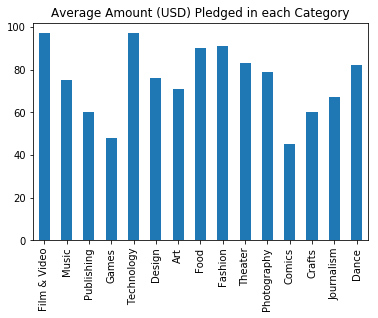

In [24]:
# Bar graph of the average money (USD) pledged for each category
category_pledged_df = categories_df.copy()
category_pledged_df.drop(category_pledged_df.columns[[0, 1, 2, 3, 4, 5]], axis=1, inplace=True)
category_pledged_df.plot(kind="bar", title="Average Amount (USD) Pledged in each Category", legend=False)

## Successful
Now we will focus solely on the subset of projects that ended up succeeding in order to gain more insight into what makes them succeed.

Below, we can see that the most successful categories (i.e. the categories with the highest successful projects to total projects ratio) are Dance, Theater, and Comics.

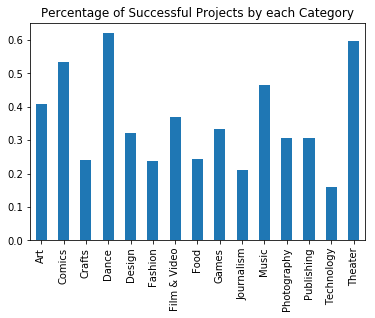

In [25]:
# Bar graph of the ratio of successful projects to total projects in each category
success_category_stats = (kickstarter_df_success["main_category"].value_counts() / kickstarter_df["main_category"].value_counts())
success_category_stats.plot(kind="bar", title="Percentage of Successful Projects by each Category", legend=False)

From the statistics and graph below on the number of days each successful project lasted for, we can see that, on average, successful projects last for about a month, or 31 days. This is essentially the same as the average number of days projects in general last on Kickstarter, indicating that the length of a project has little correlation to its success.

In [26]:
# Quick stats on number of days each successful project lasted for
print("Successful Project Timeline Statistics:")
kickstarter_df_success["timeline_days"].describe()

Successful Project Timeline Statistics:


count    128558.000000
mean         31.033681
std          11.828682
min           0.000000
25%          28.000000
50%          29.000000
75%          33.000000
max          91.000000
Name: timeline_days, dtype: float64

Text(0.5,1,'Histogram of Successful Projects Timeline')

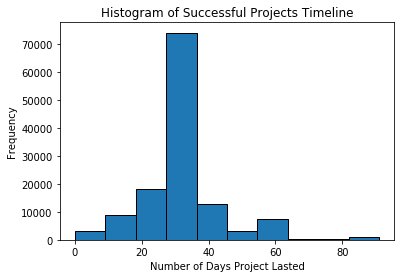

In [27]:
# Histogram of number of days each successful project lasted for
plt.hist(kickstarter_df_success["timeline_days"], edgecolor="black")
plt.xlabel("Number of Days Project Lasted")
plt.ylabel("Frequency")
plt.title("Histogram of Successful Projects Timeline")

From the statistics and graph below of the distribution of the percentage of the goal successful projects raised (log transformed) we can see that the average successful project raised 10^2.16% or about 144% of their goal, meaning that on average, successful Kickstarter projects raised 44% more than their intended goal. This figure is even without the outliers of majorly successful projects such as "Exploding Kittens."

count    128558.000000
mean          2.162422
std           0.256686
min           1.931051
25%           2.018617
50%           2.062131
75%           2.188647
max           4.776300
Name: percentage_raised, dtype: float64

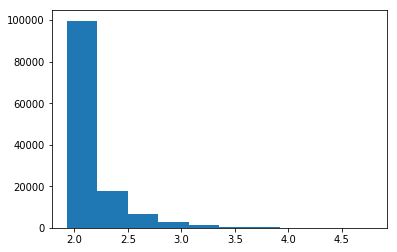

In [28]:
# Quick stats and histogram of percentage raised
percentage_raised_values = kickstarter_df_success["percentage_raised"].copy()
percentage_raised_values.replace(0, 1, inplace=True)
percentage_raised_values = np.log10(percentage_raised_values)
plt.hist(percentage_raised_values)

percentage_raised_values.describe()

## Unsuccessful (Failed, Cancelled, Suspended, etc.)
Now we turn our attention to the unsuccessful projects in order to better understand the nature of projects that did not ultimately meet their goal.

From the graph below, we can see that the most unsuccessful categories (i.e. the categories with the highest unsuccessful projects to total projects ratio) are Technology, Journalism, and Fasion (with Crafts and Food similarly unsuccessful). From this insight, people who may try to launch projects in these categories could try to focus more on other ways of increasing their success (such as by increasing awareness of their project through better marketing in order to attract more backers).

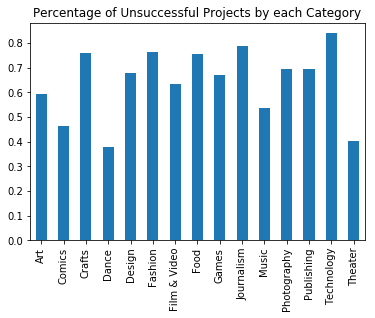

In [29]:
# Quick stats on unsuccessful project categories
# fail_category_stats = (kickstarter_df_fail["main_category"].value_counts() / len(kickstarter_df_fail["main_category"])).apply(lambda x: round(x,2))
fail_category_stats = (kickstarter_df_fail["main_category"].value_counts() / kickstarter_df["main_category"].value_counts())
fail_category_stats.plot(kind="bar", title="Percentage of Unsuccessful Projects by each Category", legend=False)

Below, we see that the average number of days unsuccessful projects last for is 34, or a little over a month. Since this is very similar to the average length of all projects as well as of successful projects, it is highly unlikely that the length of a project can tell us much about how well it will do.

In [30]:
# Quick stats on number of days each unsuccessful project lasted for
print("Unsuccessful Project Timeline Statistics:")
kickstarter_df_fail["timeline_days"].describe()

Unsuccessful Project Timeline Statistics:


count    244002.000000
mean         34.303870
std          13.176246
min           0.000000
25%          29.000000
50%          29.000000
75%          39.000000
max          91.000000
Name: timeline_days, dtype: float64

Text(0.5,1,'Histogram of Unsuccessful Projects Timeline')

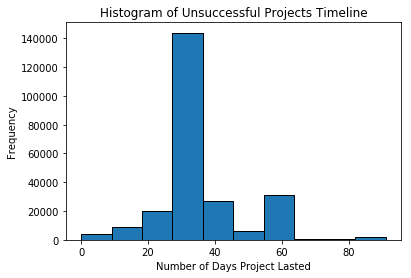

In [31]:
# Histogram of number of days each unsuccessful project lasted for
plt.hist(kickstarter_df_fail["timeline_days"], edgecolor="black")
plt.xlabel("Number of Days Project Lasted")
plt.ylabel("Frequency")
plt.title("Histogram of Unsuccessful Projects Timeline")

# Data Analysis and Results

With this data, we will be able to determine the specific aspects of a successful Kickstarter project. For our analysis, we will be comparing our multiple columns of data, excluding the column indicating whether the goal was met or not, to our percentage raised column. We will make these comparisons to determine the multiple factors that go into creating a successful project. From these correlations, we can determine what is essential in a project’s aim for success and what can be lacking that is detrimental to their success. 

In [32]:
# Create correlation dataframe
kickstarter_df.corr()

,timeline_days,backers,usd_pledged_real,usd_goal_real,percentage_raised
timeline_days,1.000000,-0.028949,-0.005974,0.074493,-0.033311
backers,-0.028949,1.000000,0.770965,-0.004862,0.132602
usd_pledged_real,-0.005974,0.770965,1.000000,0.027184,0.103196
usd_goal_real,0.074493,-0.004862,0.027184,1.000000,-0.023601
percentage_raised,-0.033311,0.132602,0.103196,-0.023601,1.000000


In the correlation dataframe above, we find the correlation values between each pair of the different columns: backers, usd pledged real, usd goal real, and percentage raised. We find that backers and usd pledged real have the highest correlation when compared to other correlations not on the diagonal of the matrix.

Text(0.5,1,'Heatmap for Correlation')

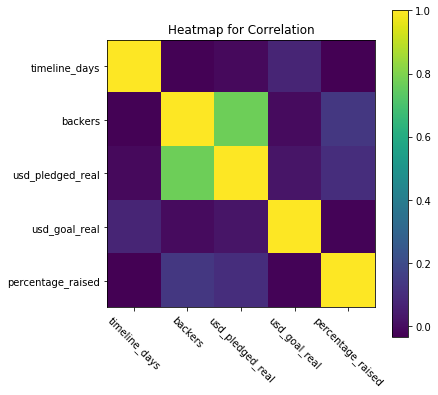

In [33]:
# Create a heatmap of the correlation values
col_labels = [col for col in kickstarter_df.corr().columns]
plt.figure(figsize=(6,6))
plt.imshow(kickstarter_df.corr(),interpolation='none') 
plt.xticks(range(len(col_labels)), col_labels, rotation=-45)
plt.yticks(range(len(col_labels)), col_labels)
plt.colorbar()
plt.title('Heatmap for Correlation')

To have a visual representation of the correlations, we are using a heatmap, which is shown above, to show the correlation amongst the multiple variables of our data.

Now that we have our original kickstarter_df dataframe separated into successful and failed/cancelled projects, we can categorize what aspects of a project can potentially lead to failure or success. We will use the corresponding correlation dataframes for the kickstarter_df_success and kickstarter_df_fail dataframes to determine what is essential in a project’s aim for success and what can be lacking that is detrimental to their success. So, our percentage column can give us a more nuanced idea of what a project is missing when being short of success, and our kickstarter_df_fail dataframe with only the failed/cancelled projects can indicate aspects that may be avoided entirely to avoid a potential project failure.

In [34]:
# Create correlation dataframe for the dataframe with only successful projects
kickstarter_df_success.corr()

,timeline_days,backers,usd_pledged_real,usd_goal_real,percentage_raised
timeline_days,1.000000,0.037853,0.089784,0.110617,-0.027168
backers,0.037853,1.000000,0.734327,0.475821,0.081109
usd_pledged_real,0.089784,0.734327,1.000000,0.835272,0.041661
usd_goal_real,0.110617,0.475821,0.835272,1.000000,-0.057349
percentage_raised,-0.027168,0.081109,0.041661,-0.057349,1.000000


In the correlation dataframe of only the successful Kickstarter projects above, we find the correlation values between each pair of the different columns: backers, usd pledged real, usd goal real, and percentage raised. We find that backers and usd pledged real have the highest correlation when compared to other correlations not on the diagonal of the matrix.

Text(0.5,1,'Heatmap for Correlation for Successful Projects')

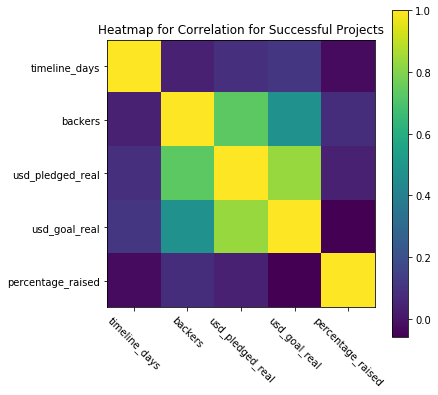

In [35]:
# Create a heatmap of the correlation values
col_labels = [col for col in kickstarter_df_success.corr().columns]
plt.figure(figsize=(6,6))
plt.imshow(kickstarter_df_success.corr(),interpolation='none') 
plt.xticks(range(len(col_labels)), col_labels, rotation=-45)
plt.yticks(range(len(col_labels)), col_labels)
plt.colorbar()
plt.title('Heatmap for Correlation for Successful Projects')

In [36]:
# Create correlation dataframe for the dataframe with only failed/cancelled projects
kickstarter_df_fail.corr()

,timeline_days,backers,usd_pledged_real,usd_goal_real,percentage_raised
timeline_days,1.000000,-0.000852,0.012204,0.069454,-0.001026
backers,-0.000852,1.000000,0.721724,0.055340,0.056273
usd_pledged_real,0.012204,0.721724,1.000000,0.094483,0.054475
usd_goal_real,0.069454,0.055340,0.094483,1.000000,-0.010132
percentage_raised,-0.001026,0.056273,0.054475,-0.010132,1.000000


In the correlation dataframe of only the failed and cancelled Kickstarter projects above, we find the correlation values between each pair of the different columns: backers, usd pledged real, usd goal real, and percentage raised. We find that backers and usd pledged real have the highest correlation when compared to other correlations not on the diagonal of the matrix.

Text(0.5,1,'Heatmap for Correlation for Unsuccessful Projects')

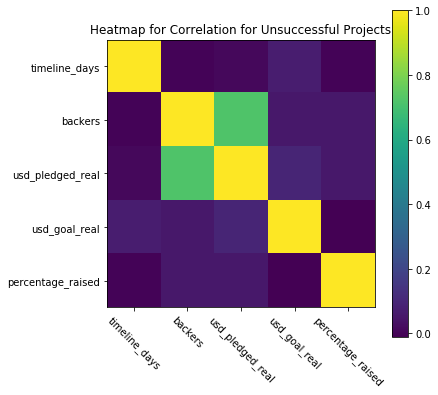

In [37]:
# Create a heatmap of the correlation values
col_labels = [col for col in kickstarter_df_fail.corr().columns]
plt.figure(figsize=(6,6))
plt.imshow(kickstarter_df_fail.corr(),interpolation='none') 
plt.xticks(range(len(col_labels)), col_labels, rotation=-45)
plt.yticks(range(len(col_labels)), col_labels)
plt.colorbar()
plt.title('Heatmap for Correlation for Unsuccessful Projects')

From the heatmap corresponding to the correlations between each of our variables for only successful Kickstarter projects, we find that both the number of backers and usd pledged real values are somewhat correlated with usd goal real (0.487272 and 0.482776, respectively). However, from the heatmap corresponding to the correlations between each of our variables for only unsuccessful Kickstarter projects, we find that both the number of backers and usd pledged real values are negligibly correlated with usd goal real (0.005532 and 0.011609, respectively). We can determine that this correlation is expected from each of the two cases of projects (successful and unsuccesful) since successful projects will likely have more backers (and therefore, more money pledged for the project) than unsuccesful projects.

So far it seems unlikely that the number of backers are closely correlated to timespan, or category of project, or even goal amount; however, we will do some prediction analysis and analyze the coefficients of our model using our hypothesis as a basis before coming to any conclusion. To determine the number of backers needed for a kickstarter to be successful, we will implement a Linear Regression model, trained on the data of successful kickstarter projects. More specifically, we'll look at timespan, category, usd_goal_real for our prediction features.

In [38]:
def OHE_categories(df, category_series):
    return df.join(pd.get_dummies(category_series))

In [39]:
#one-hot-encode categories
dataset = OHE_categories(kickstarter_df, kickstarter_df['main_category'])

#only use successful kickstarters for our model
dataset = dataset[dataset['state'] == 'successful']

#true number of backers for each kickstarter
labels = dataset['backers']

#drop unnecessary data
dataset = dataset.drop(['state', 'name', 'timeline', 'backers', 'category', 'main_category', 'percentage_raised', 'launched', 'deadline', 'usd_pledged_real'], axis=1)

#check what our data for a row looks like
print(dataset.head(1))

processed_dataset = dataset.values

from sklearn.linear_model import LinearRegression

cls = LinearRegression()

num_training = int(len(dataset) * 0.8)

training_X = processed_dataset[:num_training]
training_y = labels[:num_training]

test_X = processed_dataset[num_training:]
test_y = labels[num_training:]

cls.fit(training_X, training_y)

coef = dict(zip(list(dataset), cls.coef_.tolist()))

print("\nCoefficients:")
for key, val in coef.items():
    print("{}: {}".format(key, val))
    
#print scores: the closer the value to 1, the better
print("\nScore on training set: \t{}".format(cls.score(training_X, training_y)))
print("Score on test set: \t{}".format(cls.score(test_X, test_y)))

   timeline_days  usd_goal_real  Art  Comics  Crafts  Dance  Design  Fashion  \
5             34        50000.0    0       0       0      0       0        0   

   Film & Video  Food  Games  Journalism  Music  Photography  Publishing  \
5             0     1      0           0      0            0           0   

   Technology  Theater  
5           0        0  

Coefficients:
timeline_days: 0.013911488431010068
usd_goal_real: 0.010894163493718731
Art: -34.89584971709503
Comics: 65.3442886201015
Crafts: -17.394517967299052
Dance: -55.664078737546475
Design: 77.94545613198858
Fashion: -24.25551759286952
Film & Video: -56.23257871045651
Food: -39.55913357236075
Games: 186.86433021360227
Journalism: -14.524184478011248
Music: -35.039021680350345
Photography: -33.56655394088058
Publishing: 2.1188628562831298
Technology: 32.2722853620975
Theater: -53.413786787203684

Score on training set: 	0.318141982004563
Score on test set: 	0.32165648310779515


Analyzing the coefficients above, there seems to be a slight correlation of the number of backers needed for a particular kickstarter category. A surprising result is that the "Games" category has a relaively high positive coefficient. This means that projects under "Games" typically require more backers to be successful; this may be attributed to games requiring more funding, or a low average contribution between backers. Furthermore, we can note that while the coefficients timeline_days and usd_goal_real are much smaller in magnitude than the coefficients for categories, the values those variables can take are much larger. However, timeline_days is more often than not smaller than usd_goal_real by a factor of hundreds or thousands; thus, usd_goal_real seems to have a larger impact on the number of backers required than the constraint of days (which makes intuitive sense). Overall, the model shows a variance on the number of backers needed for different categories and various goals/timespans, which fits with our hypothesis. However, the score produced by our model for the training set and test set shows that these coefficients may not be completely reliable because our predictions are heavily influenced by a bias (y-intercept). This mediocre performance can most likely be attributed to a lack of features and not an issue of overfitting since we have more than enough data points.

# Privacy/Ethics Considerations

Throughout our project, we were careful to remain conscientious of any privacy concerns our data might breach. Thankfully, our data is made publicly available through Kaggle, and is released under Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0). What this license stipulates, is that we are allowed to freely share and adapt the data, so long as we provide appropriate credit, use it only for non-commercial purposes, and if we were to redistribute it, do so under the same license in which we received it. As our data is made publicly available from the Kickstarter Platform, there does not appear to be any privacy concerns. 

When considering the ethics of our project, there does not appear to exist any potential biases in regards to which projects are included, nor in the methods of how the data was collected. We can be confident in this as the data was collected directly from the Kickstarter Platform. The only biases that may exist would be those that are intrinsic to the platform itself, whether this be in regards to represented demographics, or any biases that the platform may have.

Ultimately, as our project did not expose any loopholes through which new content generators could use to maliciously take advantage of the Kickstart Platform, i.e. trying to deviate from their true intentions to simply generate more support, we can confidently publicize our data. 

# Conclusions and Discussion

From our models and reports, we observed that the aspects we hypothesized would influence the success of a project did not correlate with the success of projects. We observed that the histogram of the timespans of successful projects closely resembled the histogram of all projects overall, and even the timespans of unsuccessful projects. This observation proved that we were incorrect in our hypothesis that time played a role on the success of projects. We also observed that when looking at the individual categories' success rates, the Games category was amongst the categories with the lowest success percentage, while Dance, Theater, and Comics were amongst the highest. This observation contradicted our prediction of the Game category having a high rate of success, which if we further observe can be due to the high volume of projects that fall into that category. This observation can also further explain the high success rates of the categories Comics, Dance, and Theater, since these categories have amongst the lowest amount of projects. After many of our predictions being proven wrong, we further observed the individual categories, and what engagement from their backers was required for them to succeed. Every category requiered a different amount of engagement, with Game projects requiring much more backers due to the low average of donations.